In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px

In [2]:
url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
req = requests.get(url)

soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all('table')[0]

In [3]:
df = pd.read_html(str(table))[0]

df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
Date,,,
2021-05-11,1315493.0,163205,2191387
2021-05-10,1657722.0,215645,2512315
2021-05-09,1707805.0,200815,2419114
2021-05-08,1429657.0,169580,1985942
2021-05-07,1703267.0,215444,2602631
...,...,...,...
2020-05-16,NaN,193340,2091116
2020-05-15,NaN,250467,2664549
2020-05-14,NaN,234928,2611324


In [4]:
df['Difference in Travelers 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput'])
df['Difference in Travelers 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput'])
df['% Change 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput']).div(df['2020 Traveler Throughput'])
df['% Change 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput']).div(df['2019 Traveler Throughput'])

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput,Difference in Travelers 2021 vs 2020,Difference in Travelers 2020 vs 2019,% Change 2021 vs 2020,% Change 2020 vs 2019
Date,,,,,,,
2021-05-11,1315493.0,163205,2191387,1152288.0,-2028182,7.060372,-0.925524
2021-05-10,1657722.0,215645,2512315,1442077.0,-2296670,6.687273,-0.914165
2021-05-09,1707805.0,200815,2419114,1506990.0,-2218299,7.504370,-0.916988
2021-05-08,1429657.0,169580,1985942,1260077.0,-1816362,7.430576,-0.914610
2021-05-07,1703267.0,215444,2602631,1487823.0,-2387187,6.905846,-0.917221
...,...,...,...,...,...,...,...
2020-05-16,NaN,193340,2091116,NaN,-1897776,NaN,-0.907542
2020-05-15,NaN,250467,2664549,NaN,-2414082,NaN,-0.906000
2020-05-14,NaN,234928,2611324,NaN,-2376396,NaN,-0.910035


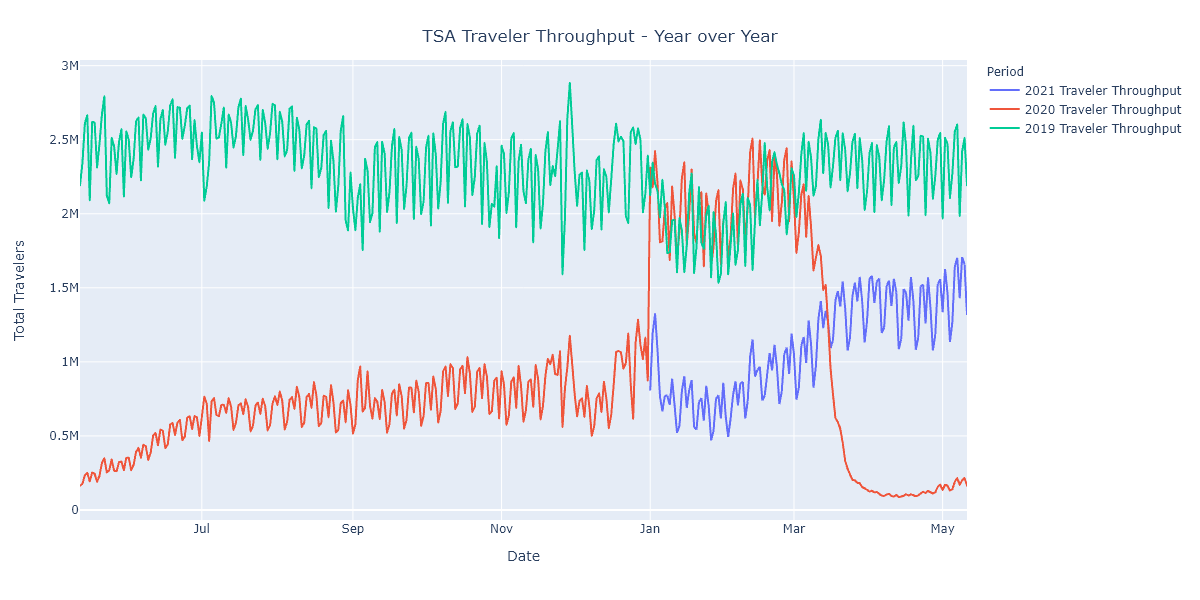

In [5]:
fig = px.line(df, y=['2021 Traveler Throughput',
                     '2020 Traveler Throughput',
                     '2019 Traveler Throughput'],
              labels={'value':'Total Travelers',
                      'variable':'Period'})

fig.update_layout(
    title={'text':'TSA Traveler Throughput - Year over Year',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.update_xaxes(tickformat='%b\n')

fig.show(renderer='png', height=600, width=1200)